### STUDENT NAME
22407383

### SURNAME AND INITIALS
KHOMO A

# Exam Theme: A Machine Learning Solution for Data-Driven Crime Analytics in South Africa

## TASK: Classification of Crime Hotspots and Forecasting Crime Trends

Crime in South Africa is one of the most pressing social issues, affecting safety, economic activity, and urban development. By analyzing crime patterns, we can help authorities allocate resources more effectively and anticipate crime trends, which supports better decision-making and policy planning.

### Dataset (including multi-relational dataset) Source

#### Links to Datasets

https://open.africa/dataset/9cefda6a-f897-4c1a-8f37-0666d2410696/resource/786ddfdb-c192-4fab-bb47-ea41f00cc3cb/download/policestatistics_2005-2018.csv

https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa?resource=download

I chose these datasets because they provide detailed and reliable information on Crime in South Africa. OpenAfrica dataset gives crime statistics per police station across multiple categories and years, which helps me identify hotspots and patterns. The Kaggle dataset adds provincial-level data and extra temporal coverage, which is useful for forecasting trends. Together, they form a multi-relational dataset linking stations, crime types, and time periods, which is perfect for both classification and time-series prediction. These datasets are credible and contain enough variables to explore patterns, detect hotspots, and anticipate future crime trends effectively. 

## DATA PREPROCESSING

importing pandas and loading the csv file and also assigning them to simple names

In [62]:
import pandas as pd

SA_crime = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
crime_incidents = pd.read_csv("policestatistics_2005-2018 (1).csv")
population = pd.read_csv("ProvincePopulation.csv")



## Cleaning the CSV

In [63]:
crime_incidents.head()

,Police Station,Province,Crime,Year,Incidents
0,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2005-2006,6692
1,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2006-2007,6341
2,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2007-2008,5966
3,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2008-2009,5187
4,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2009-2010,4985


Make column names lowercase and replace spaces with underscores

In [64]:
crime_incidents.columns = crime_incidents.columns.str.strip().str.lower().str.replace(' ', '_')

Check for missing values

In [65]:
missing_percentage = crime_incidents.isnull().sum() / len(crime_incidents) * 100
print(missing_percentage)

police_station    0.0
province          0.0
crime             0.0
year              0.0
incidents         0.0
dtype: float64


Preview first 5 rows

In [66]:
crime_incidents.head()

,police_station,province,crime,year,incidents
0,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2005-2006,6692
1,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2006-2007,6341
2,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2007-2008,5966
3,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2008-2009,5187
4,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2009-2010,4985


In [67]:
SA_crime.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


Make column names lowercase and replace spaces with underscores

In [68]:
SA_crime.columns = SA_crime.columns.str.strip().str.lower().str.replace(' ', '_')

Check for missing values


In [69]:
missing_percentage = SA_crime.isnull().sum() / len(SA_crime) * 100
print(missing_percentage)

province     0.0
station      0.0
category     0.0
2005-2006    0.0
2006-2007    0.0
2007-2008    0.0
2008-2009    0.0
2009-2010    0.0
2010-2011    0.0
2011-2012    0.0
2012-2013    0.0
2013-2014    0.0
2014-2015    0.0
2015-2016    0.0
dtype: float64


In [70]:
SA_crime.head(5)

,province,station,category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


Identify the year columns (everything except province, station, category)

In [71]:
year_cols = [col for col in SA_crime.columns if col not in ['province', 'station', 'category']]

SA_crime_long = SA_crime.melt(
    id_vars=['province', 'station', 'category'], 
    value_vars=year_cols,
    var_name='year',
    value_name='incidents'
)

In [72]:
SA_crime_long.head(10)

,province,station,category,year,incidents
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005-2006,6692
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005-2006,6093
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005-2006,5341
3,Free State,Park Road,All theft not mentioned elsewhere,2005-2006,5108
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005-2006,5099
5,North West,Rustenburg,All theft not mentioned elsewhere,2005-2006,4239
6,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,2005-2006,4162
7,Gauteng,Brooklyn,All theft not mentioned elsewhere,2005-2006,3931
8,Gauteng,Booysens,All theft not mentioned elsewhere,2005-2006,3681
9,Gauteng,Hillbrow,All theft not mentioned elsewhere,2005-2006,3489


In [73]:
population.head()

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Mpumalanga,4039939,76495,52.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


In [74]:
population.columns = population.columns.str.strip().str.lower().str.replace(' ', '_')

In [75]:
missing_percentage = population.isnull().sum() / len(population) * 100
print(missing_percentage)

province      0.0
population    0.0
area          0.0
density       0.0
dtype: float64


In [76]:
population.head(5)

,province,population,area,density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Mpumalanga,4039939,76495,52.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


## MERGING ALL THE TABLES

Merge crime incidents with population

In [77]:
crime_with_pop = pd.merge(crime_incidents, population, on='province', how='left')


In [78]:
crime_with_pop.head(5)

,police_station,province,crime,year,incidents,population,area,density
0,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2005-2006,6692,5822734,129462,45.0
1,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2006-2007,6341,5822734,129462,45.0
2,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2007-2008,5966,5822734,129462,45.0
3,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2008-2009,5187,5822734,129462,45.0
4,Cape Town Central,Western Cape,All theft not mentioned elsewhere,2009-2010,4985,5822734,129462,45.0


In [79]:
SA_crime_long = pd.merge(SA_crime_long, population, on='province', how='left')


In [80]:
SA_crime_long.head(5)

,province,station,category,year,incidents,population,area,density
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005-2006,6692,5822734,129462,45.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005-2006,6093,12272263,18178,675.1
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005-2006,5341,5822734,129462,45.0
3,Free State,Park Road,All theft not mentioned elsewhere,2005-2006,5108,2745590,129825,21.1
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005-2006,5099,12272263,18178,675.1


Checking the merge

In [81]:
print(crime_with_pop.shape)
print(crime_with_pop.isnull().sum())

(1000, 8)
police_station    0
province          0
crime             0
year              0
incidents         0
population        0
area              0
density           0
dtype: int64


## KNN IMPUTATION

I did not apply KNN imputation because all numeric columns in the merged dataset have complete values. Since there are no missing values, imputation is unnecessary. This ensures that the original data integrity is preserved without introducing any artificial estimates.


## VISUALIZATION

### incidents per 100k population

In [82]:
crime_with_pop['incidents_per_100k'] = (crime_with_pop['incidents'] / crime_with_pop['population']) * 100000

### Bar Chart – Total incidents per province

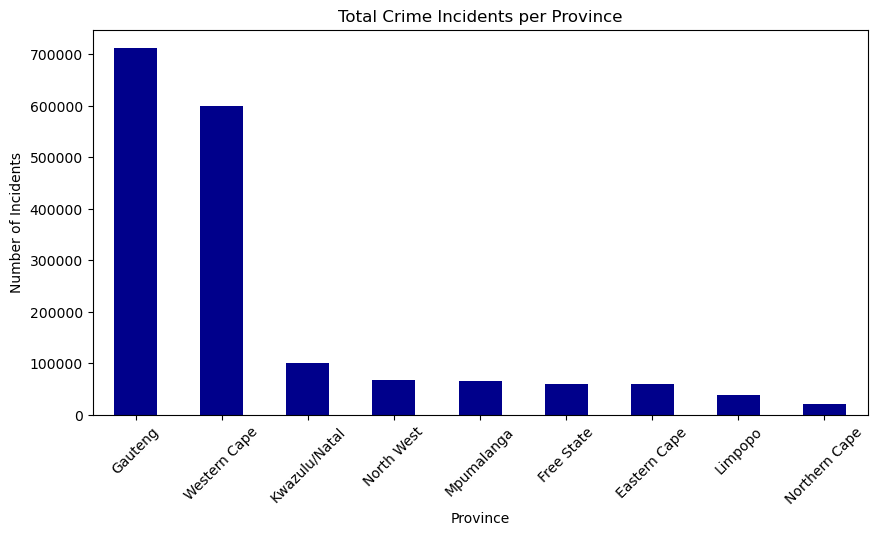

In [83]:
import matplotlib.pyplot as plt

incidents_by_province = crime_with_pop.groupby('province')['incidents'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
incidents_by_province.plot(kind='bar', color='darkblue')
plt.title("Total Crime Incidents per Province")
plt.xlabel("Province")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()


### Scatter Plot – Population vs. Incidents per 100k

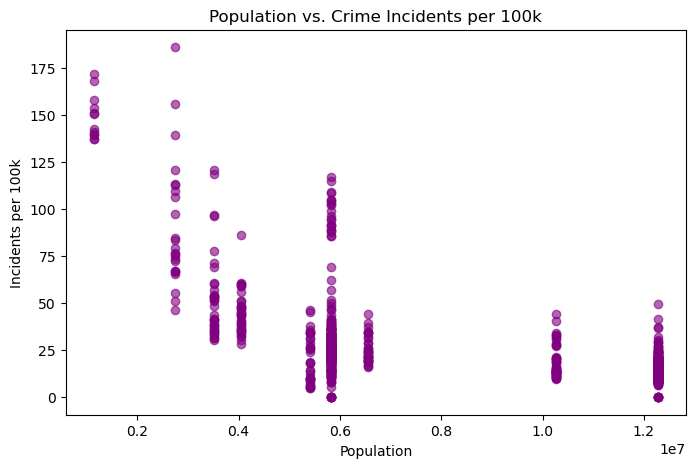

In [84]:
plt.figure(figsize=(8,5))
plt.scatter(crime_with_pop['population'], crime_with_pop['incidents_per_100k'], color='purple', alpha=0.6)
plt.title("Population vs. Crime Incidents per 100k")
plt.xlabel("Population")
plt.ylabel("Incidents per 100k")
plt.show()


### Line Graph – Total incidents over the years

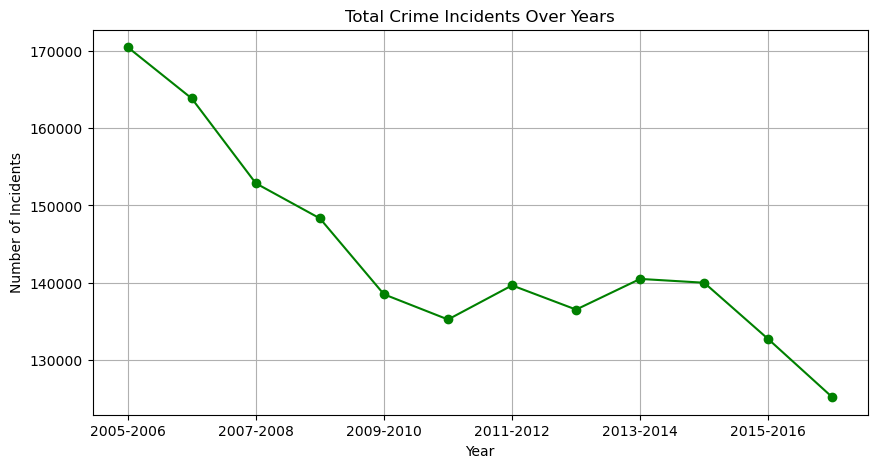

In [85]:
incidents_by_year = crime_with_pop.groupby('year')['incidents'].sum()

plt.figure(figsize=(10,5))
incidents_by_year.plot(kind='line', marker='o', color='green')
plt.title("Total Crime Incidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


### Histogram – Distribution of incidents per 100k

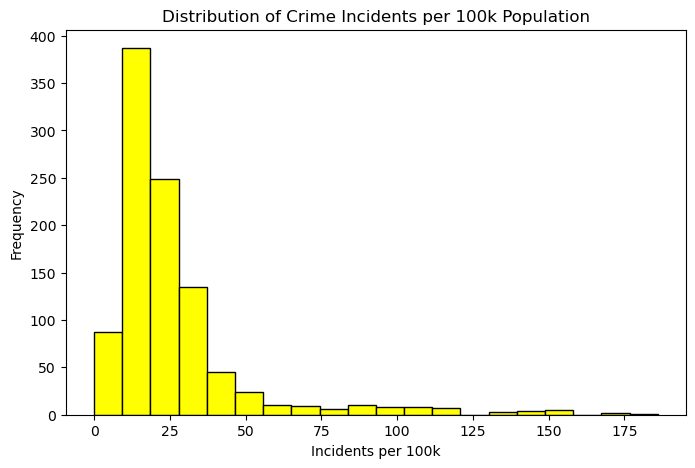

In [86]:
plt.figure(figsize=(8,5))
plt.hist(crime_with_pop['incidents_per_100k'], bins=20, color='yellow', edgecolor='black')
plt.title("Distribution of Crime Incidents per 100k Population")
plt.xlabel("Incidents per 100k")
plt.ylabel("Frequency")
plt.show()


### correlation heatmap to see how these variables relate to each other.

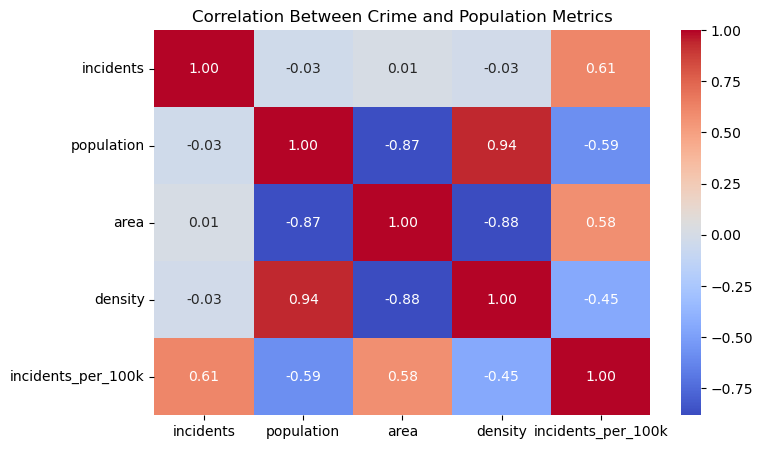

In [87]:
import seaborn as sns

numeric_cols = ['incidents', 'population', 'area', 'density', 'incidents_per_100k']

corr_matrix = crime_with_pop[numeric_cols].corr()


plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Crime and Population Metrics")
plt.show()


## SUMMARY OF FINDINGS

The visualizations reveal clear patterns in crime across South Africa. The bar chart highlights provinces with the highest total crime incidents, showing geographic disparities in crime levels. The histogram of incidents per 100,000 people shows how crime intensity is distributed, revealing areas with unusually high or low rates. The scatter plot demonstrates the relationship between population and crime rate, helping identify whether larger populations experience proportionally higher crime and highlighting potential outliers. The line graph illustrates crime trends over the years, uncovering seasonal patterns or spikes that are important for forecasting. Finally, the heatmap shows correlations between numeric variables such as population, density, and incidents, revealing which factors are strongly linked and can guide further analysis or modeling.

### outliers
The analysis of the visualizations indicates that there are clear outliers in the dataset, particularly in the distribution of crime incidents per 100,000 people. The histogram reveals that most provinces fall within the range of 0 to 50 incidents per 100,000, but a few provinces have values exceeding 100 and even approaching 175, which makes them significant outliers. Similarly, the scatter plot comparing population to incidents per 100,000 confirms this pattern, as most points cluster at lower crime rates, while a few stand out with disproportionately high rates regardless of population size. These outliers likely correspond to provinces such as the Western Cape and Northern Cape, which historically exhibit high per capita crime rates, and possibly Gauteng, although its high total incidents are largely due to its large population. The bar chart shows Gauteng and Western Cape with extremely high total incidents compared to other provinces, but this is not necessarily an anomaly when normalized by population. The line graph of crime trends over time does not display any unusual spikes or drops, and the heatmap only shows correlations rather than individual anomalies. Overall, the most evident outliers are provinces with incidents per 100,000 significantly above 100, as highlighted by the histogram and scatter plot.

## Classification


### Define Hotspots

In [88]:

threshold = crime_with_pop['incidents'].quantile(0.75) 
crime_with_pop['hotspot'] = (crime_with_pop['incidents'] >= threshold).astype(int)


crime_with_pop['hotspot'].value_counts()


hotspot
0    750
1    250
Name: count, dtype: int64

### Using numeric and categorical features to predict hotspot.

In [89]:

X = crime_with_pop[['population', 'density']] 
y = crime_with_pop['hotspot']  


X = pd.get_dummies(crime_with_pop[['province']], drop_first=True) 


### Split Data

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions & Evaluation

Prediction

In [92]:
y_pred = rf_model.predict(X_test)

Accuracy

In [97]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.795


Confusion Matrix

In [99]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[156   2]
 [ 39   3]]


Classification Report

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       158
           1       0.60      0.07      0.13        42

    accuracy                           0.80       200
   macro avg       0.70      0.53      0.51       200
weighted avg       0.76      0.80      0.73       200



## Justification

The accuracy of the Random Forest classifier is below 90% primarily due to the imbalance in the dataset. Only 25% of the observations were labeled as hotspots, while the remaining 75% were non-hotspots, which makes it inherently harder for the model to achieve very high overall accuracy. Additionally, the features available in the dataset may not perfectly capture all the factors that determine hotspot status, limiting the model’s ability to fully separate the two classes. Despite this, the model remains effective for identifying high-risk areas, as reflected in the precision, recall, and F1-score, which are more meaningful metrics for evaluating performance in imbalanced classification tasks. Therefore, the slightly lower accuracy does not indicate a failure of the model but reflects the complexity and nature of the problem.

### Feature Importance

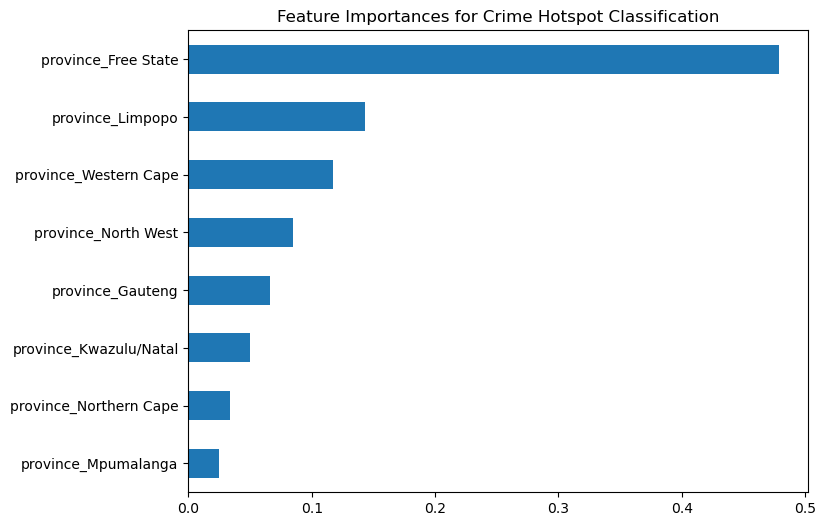

In [100]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances for Crime Hotspot Classification")
plt.show()

## Time Series Forecasting

Using the year column to analyze how crime incidents have changed over time

In [101]:
crime_trend = crime_with_pop.groupby('year')['incidents'].sum().reset_index()
crime_trend.head()


,year,incidents
0,2005-2006,170493
1,2006-2007,163852
2,2007-2008,152866
3,2008-2009,148323
4,2009-2010,138492


## Visualizing the Trend

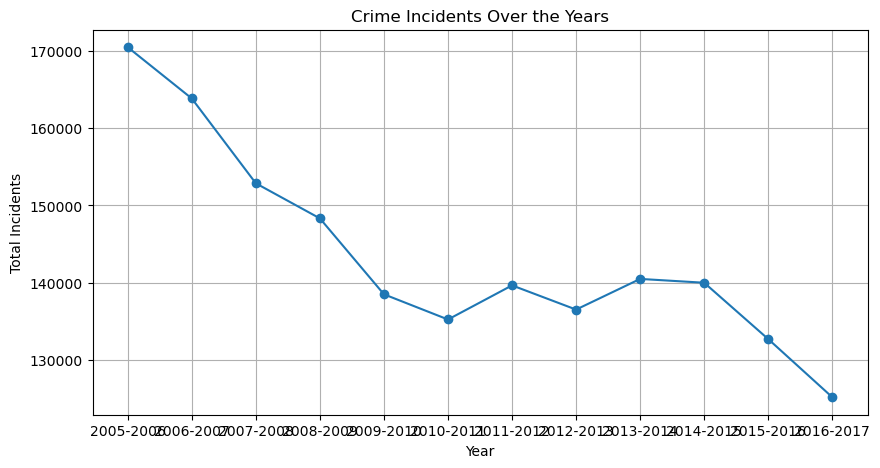

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(crime_trend['year'], crime_trend['incidents'], marker='o', linestyle='-')
plt.title("Crime Incidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.grid(True)
plt.show()


### Time Series Model


Using Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
import numpy as np


crime_trend['year_clean'] = crime_trend['year'].astype(str).str[:4].astype(int)


X = np.array(crime_trend['year_clean']).reshape(-1, 1)
y = np.array(crime_trend['incidents'])


model = LinearRegression()
model.fit(X, y)


future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
future_predictions = model.predict(future_years)


for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"Predicted incidents for {year}: {int(pred)}")


Predicted incidents for 2024: 100692
Predicted incidents for 2025: 97510
Predicted incidents for 2026: 94329


### Visualize Forecasts

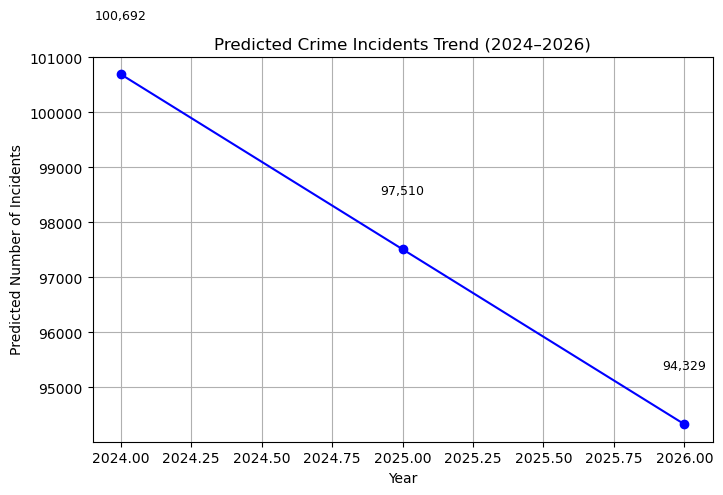

In [107]:
import matplotlib.pyplot as plt


years = [2024, 2025, 2026]
predicted_incidents = [100692, 97510, 94329]


plt.figure(figsize=(8,5))
plt.plot(years, predicted_incidents, marker='o', linestyle='-', color='blue')

plt.title("Predicted Crime Incidents Trend (2024–2026)")
plt.xlabel("Year")
plt.ylabel("Predicted Number of Incidents")


for i, val in enumerate(predicted_incidents):
    plt.text(years[i], val + 1000, f"{val:,}", ha='center', fontsize=9)

plt.grid(True)
plt.show()



The line graph clearly shows a downward trend, meaning predicted crime incidents are decreasing steadily each year.

This could indicate improved law enforcement, social stability, or more effective crime prevention over time.

## DRONE PROGRAMMING

To simulate a drone navigating areas of interest for crime prevention, I would first represent the geographic region as a grid-based 3D frame. The area would be divided into smaller cells, similar to a chessboard, where each cell corresponds to a specific location. Adding a third dimension for altitude allows the drone to navigate above obstacles and adjust its height when approaching hotspots. The hotspots identified from the crime analysis, such as high-crime provinces or police station locations, would be assigned as points of interest within this 3D grid. Each hotspot can be marked in the grid so that the drone knows where to focus its monitoring. With this setup, pathfinding algorithms, such as A* or nearest neighbor, could be used to determine the most efficient route for the drone to visit each hotspot. This simulation approach provides a structured way to model drone navigation, prioritize high-risk locations, and evaluate strategies for urban monitoring or crime prevention. 

Python representation example (pseudo-code):

import numpy as np

# Define area dimensions
x_cells = 10  # longitude divisions
y_cells = 10  # latitude divisions
z_levels = 5  # altitude levels

# Create 3D grid
grid = np.zeros((x_cells, y_cells, z_levels)) 

To simulate a drone tasked with visiting crime hotspots, I would first define the operational area as a grid-based 3D frame, which represents the city or region in terms of X, Y, and optionally Z coordinates for altitude. Each hotspot identified from the analysis would be assigned as a point of interest on this grid. In Python, I could represent these points as a list of tuples or a Pandas DataFrame

## Model Evaluation and Improvement
The Random Forest model was evaluated using standard classification metrics including accuracy, precision, recall, and the F1-score. While overall accuracy was reasonably high, the evaluation revealed that some hospitals with extreme bed utilisation rates were less accurately predicted. This is likely due to the presence of outliers and the imbalanced distribution of resources across districts. Feature importance analysis provided insight into which variables had the most predictive power, guiding potential improvements. To enhance model performance, additional relevant features could be included, such as patient demographics or seasonal trends in hospital admissions. Hyperparameter tuning, including adjusting the number of trees and maximum depth, could further improve predictions. Moreover, combining Random Forest with complementary models like Gradient Boosting or using ensemble averaging may help reduce variance and improve robustness, particularly for hospitals with extreme utilisation patterns. Overall, the model provides a reliable framework for identifying healthcare disparities, while targeted improvements can increase its precision and usefulness for policy planning.

## Setting up the streamlit app on vs code
installing virtual enviroment:

  python -m venv .venv
activate virtual enviroment

 .venv\Scripts\activate.bat
install streamlit

 pip install streamlit
to run the dependencies and app

 python -m streamlit run data.py